In [1]:
%matplotlib inline

In [2]:
from kid_readout.measurement.io import npy

In [3]:
figure_directory = '/home/flanigan/temp/'

In [4]:
npd = npy.NumpyDirectory('/data/detectors/2017-04-17_130854_scan.npd/')

In [13]:
print(npd.metadata.script_code)

"""
Scan a large frequency range at a given frequency resolution. At each LO frequency, scan most of the positive baseband
frequencies and save one SweepArray.
"""
from __future__ import division
import time

import numpy as np

from kid_readout.roach import analog, hardware_tools, tools
from kid_readout.measurement import acquire, basic, core
from kid_readout.equipment import hardware

acquire.show_settings()
acquire.show_git_status()
logger = acquire.get_script_logger(__file__)


# Parameters
suffix = 'scan'
attenuations = [0]
df_baseband_target = 20e3
f_start = 1500e6
f_stop = 3500e6
overlap_fraction = 0.5
f_baseband_minimum = 10e6  # Keep the tones above the LO by at least this frequency
f_baseband_maximum = 180e6  # Keep the tones below this frequency
length_seconds = 0  # Take the minimum amount of data, in this case one block
filterbank_bin_separation = 2  # The minimum number of PFB bins that separate tones
df_lo = 2.5e3  # The minimum
num_tones_maximum = 32  # Imposed by the d

In [5]:
scan = npd.Scan0
snaps = [npd.read(name) for name in npd.node_names() if name.startswith('ADCSnap')]

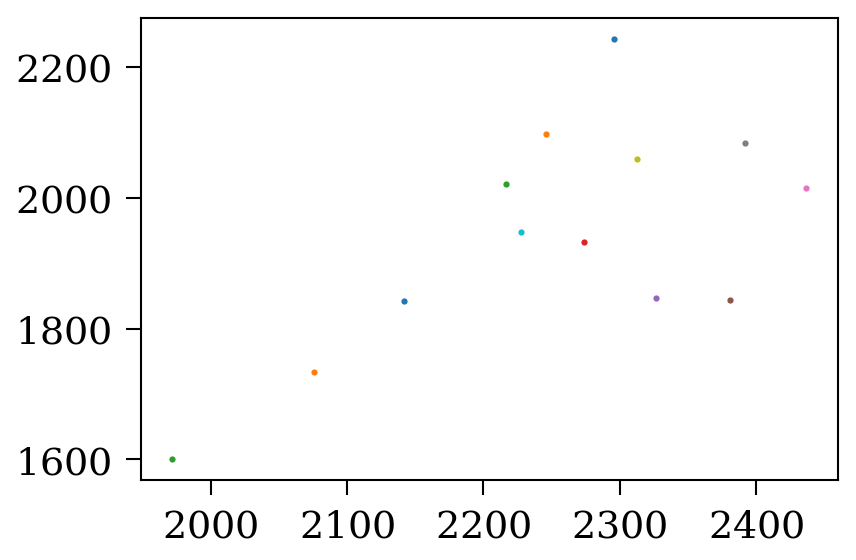

In [8]:
fig, ax = plt.subplots()
for snap in snaps:
    ax.plot(snap.x.ptp(), snap.y.ptp(), '.')

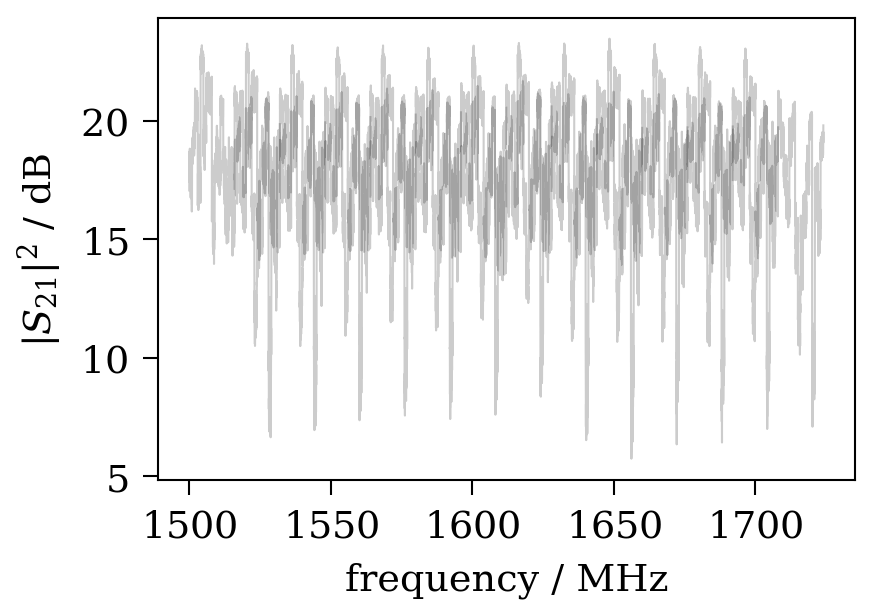

In [10]:
fig, ax = plt.subplots()
ax.set_xlabel('frequency / MHz')
ax.set_ylabel('$|S_{21}|^2$ / dB')

for sweep in scan.sweep_arrays:
    ax.plot(sweep.frequency_MHz, 20 * np.log10(np.abs(sweep.s21_point)), '-k', alpha=0.2)

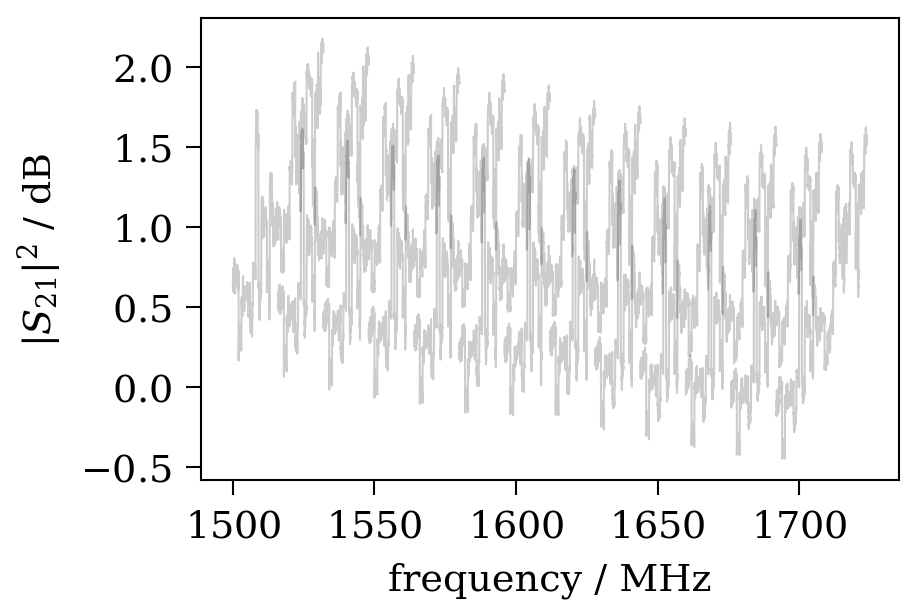

In [11]:
fig, ax = plt.subplots()
ax.set_xlabel('frequency / MHz')
ax.set_ylabel('$|S_{21}|^2$ / dB')

for sweep in scan.sweep_arrays:
    ax.plot(sweep.frequency_MHz, np.angle(sweep.s21_point), '-k', alpha=0.2)

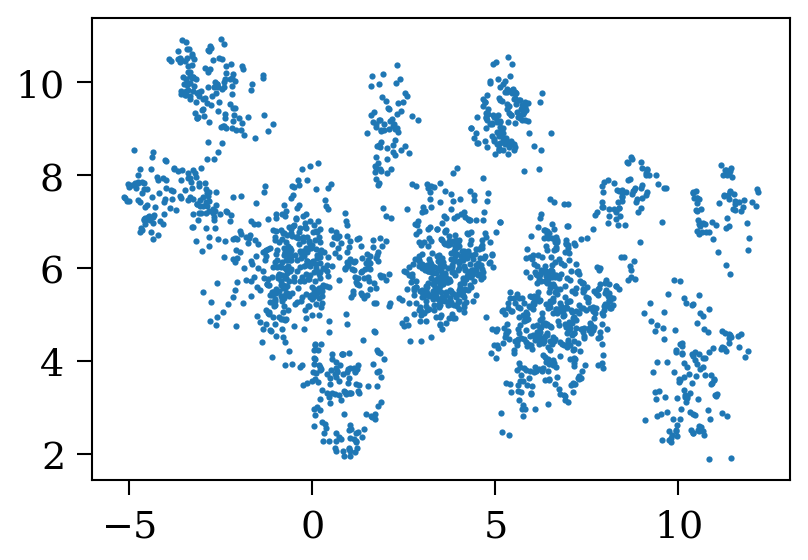

In [12]:

fig, ax = plt.subplots()
ax.plot(scan.sweep_arrays[0].s21_point.real, scan.sweep_arrays[0].s21_point.imag, '.')